In [1]:
pip install -U finance-datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly

   ---------------------------------------- 0.0/15.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.7 MB 2.0 MB/s eta 0:00:08
   - -------------------------------------- 0.7/15.7 MB 8.3 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/15.7 MB 9.0 MB/s eta 0:00:02
   ---- ----------------------------------- 1.8/15.7 MB 10.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.7 MB 11.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.7 MB 11.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.7 MB 11.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.7 MB 11.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.7 MB 11.1 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.7 MB 11.1 MB/s eta 0:00:02
   ------ --------------------------------- 2.7/15.7 MB 5.1 MB/s eta 0:00:03
   --------- ------------------------------ 3.6/15.7 MB 6.4 MB/s eta 0:00:02


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2-1. 데이터 로드

In [4]:
import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = fdr.DataReader('005930', '2018-05-04', '2020-01-22')
df.head()


,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-05-04,53000,53900,51800,51900,39565391,-0.020755
2018-05-08,52600,53200,51900,52600,23104720,0.013487
2018-05-09,52600,52800,50900,50900,16128305,-0.032319
2018-05-10,51700,51700,50600,51600,13905263,0.013752
2018-05-11,52000,52200,51200,51300,10314997,-0.005814


In [6]:
print(df.shape)


(421, 6)


## 2-2. 데이터 전처리 - MinMaxScaler

MinMaxScaler는 데이터의 값의 범위를 줄여주는 기법으로 머신 러닝과 데이터 분석에서 자주 사용되는 방법입니다. 이를 사용하면 값의 범위가 0~1 사이로 변환됩니다.

수식은 다음과 같습니다.

(X - X의 최소값) / (X의 최대값 - X의 최소값)
숫자 단위가 클수록 계산에 소요되는 시간이 늘어납니다. 시간 소요를 줄이기 위해서 삼성전자 데이터에 MinMaxScaler를 적용해봅시다. 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눕니다.

In [7]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)


In [8]:
dfx = df[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx


,Open,High,Low,Volume
Date,,,,
2018-05-04,0.633401,0.646825,0.601610,0.595060
2018-05-08,0.617108,0.619048,0.605634,0.316465
2018-05-09,0.617108,0.603175,0.565392,0.198390
2018-05-10,0.580448,0.559524,0.553320,0.160765
2018-05-11,0.592668,0.579365,0.577465,0.100000
...,...,...,...,...
2020-01-16,0.881874,0.916667,0.891348,0.168830
2020-01-17,0.995927,0.968254,0.971831,0.196653
2020-01-20,1.000000,1.000000,1.000000,0.137469


In [9]:
dfy.head()


,Close
Date,
2018-05-04,0.579158
2018-05-08,0.607214
2018-05-09,0.539078
2018-05-10,0.567134
2018-05-11,0.555110


In [10]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()


In [11]:
X[:5]


[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015]]

In [12]:
y[:5]

[[0.5791583166309452],
 [0.6072144288552817],
 [0.5390781563104646],
 [0.5671342685348011],
 [0.5551102204386569]]

## 2-3 데이터 전처리 - 10일 동안의 OHLVC 데이터로 다음 날의 종가를 예측

In [13]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)


[[0.7637474541720417, 0.7857142857111677, 0.7665995975824281, 0.323174686971615], [0.8533604887948947, 0.8333333333300265, 0.8269617706204146, 0.33335345138624783], [0.8696537678172315, 0.8769841269806469, 0.8631790744432065, 0.19622106804249292], [0.9022403258619053, 0.8888888888853615, 0.8953722333967993, 0.117672127572782], [0.9348268839065791, 0.9285714285677438, 0.927565392350392, 0.21155713424914332], [0.898167006106321, 0.8730158730124087, 0.8873239436584011, 0.1674615836301646], [0.8818737270839841, 0.9166666666630291, 0.8913480885276002, 0.16882989330989187], [0.9959266802403425, 0.968253968250126, 0.9718309859115821, 0.19665250042066781], [0.9999999999959267, 0.9999999999960317, 0.9999999999959758, 0.13746944253371812], [0.9999999999959267, 0.9841269841230789, 0.9798792756499803, 0.11400880277083453]] -> [0.9959919839639438]


In [14]:
# 10일간의 OHLVC 데이터
data_X[0]


[[0.6334012219933466,
  0.64682539682283,
  0.6016096579452651,
  0.5950598479352758],
 [0.6171079429710097,
  0.6190476190451625,
  0.6056338028144642,
  0.3164647972944813],
 [0.6171079429710097,
  0.6031746031722096,
  0.5653923541224732,
  0.19838973885875907],
 [0.5804480651707518,
  0.5595238095215892,
  0.5533199195148759,
  0.16076499691679247],
 [0.5926680244375044,
  0.5793650793627803,
  0.5774647887300706,
  0.10000013878410015],
 [0.5519348268816622,
  0.5357142857121598,
  0.5251509054304823,
  0.17775773908379244],
 [0.5193482688369884,
  0.5079365079344923,
  0.4929577464768895,
  0.24207018961868487],
 [0.47861507128114616,
  0.49999999999801586,
  0.49496981891148906,
  0.19484190950809502],
 [0.5234215885925726,
  0.5119047619027305,
  0.5050301810844868,
  0.100853881024588],
 [0.5071283095702357,
  0.4880952380933012,
  0.5030181086498873,
  0.03892790771899896]]

In [15]:
# data_X[0]을 넣었을 때의 정답인 data_y[0]
data_y[0]


[0.503006012022032]

## 2-4. 훈련 데이터와 테스트 데이터를 분리

In [16]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))


전체 데이터의 크기 : 411 411


In [17]:
#학습에 사용할 훈련 데이터와 테스트 데이터를 분리해봅시다. 비율은 7:3으로 하고자 합니다.
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)


훈련 데이터의 크기 : (287, 10, 4) (287, 1)
테스트 데이터의 크기 : (124, 10, 4) (124, 1)


In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


Tip #1) LSTM에다가 LSTM을 한 번 더 사용하려면 앞의 LSTM에는 return_seqeucens=True를 해주셔야 합니다.

Tip #2) units의 값은 사용자가 임의로 정해주는 LSTM의 용량으로 정답은 없습니다.

Tip #3) Dropout은 학습을 더 잘하게 하기 위한 일종의 선택적인 장치로 이 안의 값은 0과 1사이의 값을 넣어주면 되며 이 값 또한 정답은 없습니다.

In [19]:
model = Sequential()
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=1))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 20)            2000      
                                                                 
 dropout (Dropout)           (None, 10, 20)            0         
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)


Epoch 1/70
10/10 [==============================] - 2s 5ms/step - loss: 0.0020
Epoch 2/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 3/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 4/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 5/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 6/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 7/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 8/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 9/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 10/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0021
Epoch 11/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0024
Epoch 12/70
10/10 [==============================] - 0s 4ms/step - loss: 0.0022
Epoch 13/70
10/10 [==============================

4/4 [==============================] - 0s 2ms/step


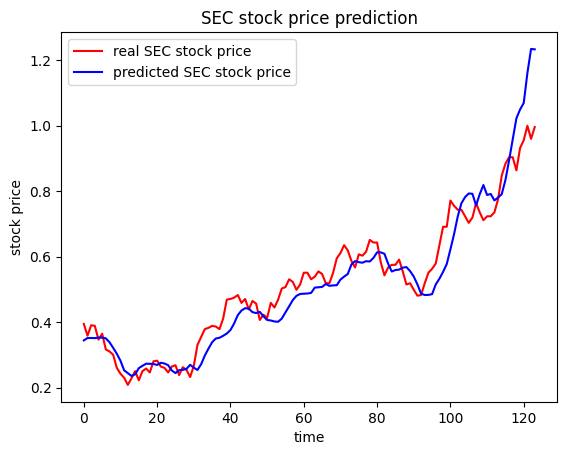

내일 SEC 주가 : [77143.555] KRW


In [25]:
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real SEC stock price')
plt.plot(pred_y, color='blue', label='predicted SEC stock price')
plt.title('SEC stock price prediction')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

print("내일 SEC 주가 :", df.Close[-1] * pred_y[-1] / dfy.Close[-1], 'KRW')
